# Collaboration and Competition

In [3]:
env = UnityEnvironment(file_name="../Tennis_Linux/Tennis.x86", no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

### State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -7.38993645 -1.5
 -0.          0.          6.83172083  5.99607611 -0.          0.        ]


### Model

The architecture is comprised of two neural networks(Actor and Critic) defined in model.py

Both the Actor and critic network takes in state_size (int): Dimension of each state, action_size (int): Dimension of each action, seed (int): Random seed, fc1_units (int): Number of nodes in first hidden layer, fc2_units (int): Number of nodes in second hidden layer.

Number of nodes in first hidden layer=200, Number of nodes in second hidden layer=150

The agent continues episodical training via the the ddpg agent until n_episoses is reached or until the environment is solved. The environment is considered solved when the average reward is at least +0.5.

Each episode continues until max_t time-steps is reached or until the environment says it's done.


### Learning Algorithm
The algorithm used is deep deterministic policy gradient, the DDPG agent is contained in agent.py

For each time step and agent the Agent acts upon the state utilising a shared (at class level) replay_buffer, actor_local, actor_target, actor_optimizer, critic_local, criticl_target and critic_optimizer networks.
DDPG Hyper Parameters

    n_episodes (int): maximum number of training episodes
DDPG Agent Hyper Parameters

    BUFFER_SIZE (int): replay buffer size
    BATCH_SIZ (int): mini batch size
    GAMMA (float): discount factor
    TAU (float): for soft update of target parameters
    LR_ACTOR (float): learning rate for optimizer
    LR_CRITIC (float): learning rate for optimizer
    WEIGHT_DECAY (float): L2 weight decay
    N_TIME_STEPS (int): every n time step do update

BUFFER_SIZE = int(1e5), BATCH_SIZE = 250, GAMMA = 0.99, TAU = 1e-3,
LR_ACTOR = 1e-4, LR_CRITIC = 1e-3, WEIGHT_DECAY = 0

The learn function in the DDPGAgent class updates policy and value parameters using given batch of experience tuples.

    Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value

    Params
    ======
        experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
        gamma (float): discount factor
Mean squared error loss is used to calculate the loss in both the critic and minimized using backprop. 

### Plot of Rewards

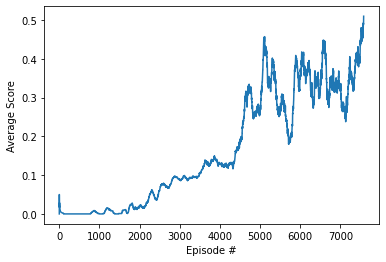

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(average_scores_list)+1), average_scores_list)
plt.ylabel('Average Score')
plt.xlabel('Episode #')
plt.show()

### Ideas for Future Work
Further continue to experiment with different hyperparameters and note the scores and training time.
Experiment with other algorithims e.g PPO and note how well it performs

Noticed the under utilization of gpu and overall compute resources, further check on how to train in a way that it utilizes all the compute resources to a maximum(this might reduce the long training times but yet to be tried)